# Introduction to Machine Learning in Python

In this section we'll go through some preliminary topics, as well as some of the
requirements for this tutorial.

By the end of this section you should:

- Know what sort of tasks qualify as Machine Learning problems.
- See some simple examples of machine learning
- Know the basics of creating and manipulating numpy arrays.
- Know the basics of scatter plots in matplotlib.

## What is Machine Learning?

In this section we will begin to explore the basic principles of machine learning.
Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items
like a database system would do.

We'll take a look at two very simple machine learning tasks here.
The first is a **classification** task: the figure shows a
collection of two-dimensional data, colored according to two different class
labels. A classification algorithm may be used to draw a dividing boundary
between the two clusters of points:

In [1]:
# Start pylab inline mode, so figures will appear in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


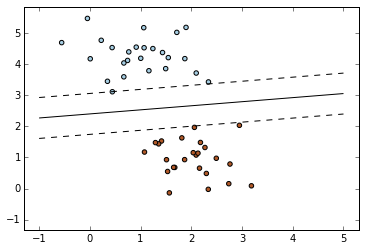

In [2]:
# Import the example plot from the figures directory
from figures import plot_sgd_separator
plot_sgd_separator()

This may seem like a trivial task, but it is a simple version of a very important concept.
By drawing this separating line, we have learned a model which can **generalize** to new
data: if you were to drop another point onto the plane which is unlabeled, this algorithm
could now **predict** whether it's a blue or a red point.

If you'd like to see the source code used to generate this, you can either open the
code in the `figures` directory, or you can load the code using the `%load` magic command:

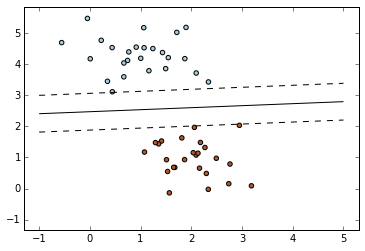

In [4]:
# %load figures/sgd_separator.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs

def plot_sgd_separator():
    # we create 50 separable points
    X, Y = make_blobs(n_samples=50, centers=2,
                      random_state=0, cluster_std=0.60)

    # fit the model
    clf = SGDClassifier(loss="hinge", alpha=0.01,
                        n_iter=200, fit_intercept=True)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    xx = np.linspace(-1, 5, 10)
    yy = np.linspace(-1, 5, 10)

    X1, X2 = np.meshgrid(xx, yy)
    Z = np.empty(X1.shape)
    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = clf.decision_function([x1, x2])
        Z[i, j] = p[0]
    levels = [-1.0, 0.0, 1.0]
    linestyles = ['dashed', 'solid', 'dashed']
    colors = 'k'

    ax = plt.axes()
    ax.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

    ax.axis('tight')


if __name__ == '__main__':
    plot_sgd_separator()
    plt.show()


The next simple task we'll look at is a **regression** task: a simple best-fit line
to a set of data:

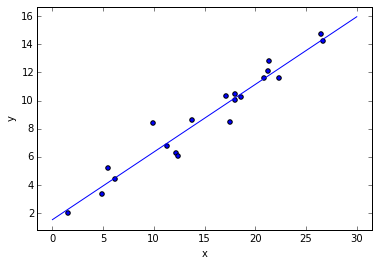

In [5]:
from figures import plot_linear_regression
plot_linear_regression()

Again, this is an example of fitting a model to data, such that the model can make
generalizations about new data.  The model has been **learned** from the training
data, and can be used to predict the result of test data:
here, we might be given an x-value, and the model would
allow us to predict the y value.  Again, this might seem like a trivial problem,
but it is a basic example of a type of operation that is fundamental to
machine learning tasks.

## Numpy Arrays

Manipulating `numpy` arrays is an important part of doing machine learning
(or, really, any type of scientific computation) in python.  This will likely
be review for most: we'll quickly go through some of the most important features.

In [6]:
import numpy as np

# Generating a random array
X = np.random.random((3, 5))  # a 3 x 5 array

print X

[[ 0.47791862  0.1247352   0.56085286  0.8710508   0.29699858]
 [ 0.46353129  0.62517436  0.22454558  0.99979221  0.29126202]
 [ 0.92317274  0.28285119  0.35694448  0.2836271   0.18433259]]


In [7]:
# Accessing elements

# get a single element
print X[0, 0]

# get a row
print X[1]

# get a column
print X[:, 1]

0.477918619585
[ 0.46353129  0.62517436  0.22454558  0.99979221  0.29126202]
[ 0.1247352   0.62517436  0.28285119]


In [8]:
# Transposing an array
print X.T

[[ 0.47791862  0.46353129  0.92317274]
 [ 0.1247352   0.62517436  0.28285119]
 [ 0.56085286  0.22454558  0.35694448]
 [ 0.8710508   0.99979221  0.2836271 ]
 [ 0.29699858  0.29126202  0.18433259]]


In [9]:
# Turning a row vector into a column vector
y = np.linspace(0, 12, 5)
print y

[  0.   3.   6.   9.  12.]


In [10]:
# make into a column vector
print y[:, np.newaxis]

[[  0.]
 [  3.]
 [  6.]
 [  9.]
 [ 12.]]


There is much, much more to know, but these few operations are fundamental to what we'll
do during this tutorial.

## Scipy Sparse Matrices

We won't make very much use of these in this tutorial, but sparse matrices are very nice
in some situations.  For example, in some machine learning tasks, especially those associated
with textual analysis, the data may be mostly zeros.  Storing all these zeros is very
inefficient.  We can create and manipulate sparse matrices as follows:

In [11]:
from scipy import sparse

# Create a random array with a lot of zeros
X = np.random.random((10, 5))
print X

[[ 0.8376125   0.73102212  0.73464113  0.72955127  0.66752296]
 [ 0.49722902  0.50221527  0.44404168  0.88213658  0.16422159]
 [ 0.18080492  0.95989728  0.5251905   0.99136339  0.95954552]
 [ 0.8768549   0.42729333  0.23995686  0.50593595  0.68767125]
 [ 0.2057258   0.87814557  0.41706274  0.22366781  0.54641068]
 [ 0.49588361  0.32187149  0.94874095  0.93310938  0.67493207]
 [ 0.6974371   0.61409219  0.25856459  0.94070723  0.22108853]
 [ 0.16507385  0.11239087  0.50139925  0.42147981  0.56932738]
 [ 0.96569568  0.131721    0.2780489   0.22146387  0.64680879]
 [ 0.21400891  0.98158621  0.19601345  0.96791757  0.41819848]]


In [12]:
# set the majority of elements to zero
X[X < 0.7] = 0
print X

[[ 0.8376125   0.73102212  0.73464113  0.72955127  0.        ]
 [ 0.          0.          0.          0.88213658  0.        ]
 [ 0.          0.95989728  0.          0.99136339  0.95954552]
 [ 0.8768549   0.          0.          0.          0.        ]
 [ 0.          0.87814557  0.          0.          0.        ]
 [ 0.          0.          0.94874095  0.93310938  0.        ]
 [ 0.          0.          0.          0.94070723  0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.96569568  0.          0.          0.          0.        ]
 [ 0.          0.98158621  0.          0.96791757  0.        ]]


In [13]:
# turn X into a csr (Compressed-Sparse-Row) matrix
X_csr = sparse.csr_matrix(X)
print X_csr

  (0, 0)	0.837612500205
  (0, 1)	0.731022122717
  (0, 2)	0.734641126831
  (0, 3)	0.72955126999
  (1, 3)	0.882136583994
  (2, 1)	0.959897284885
  (2, 3)	0.991363385356
  (2, 4)	0.959545523165
  (3, 0)	0.876854895704
  (4, 1)	0.878145572903
  (5, 2)	0.948740949163
  (5, 3)	0.933109378694
  (6, 3)	0.940707225559
  (8, 0)	0.965695683875
  (9, 1)	0.981586207846
  (9, 3)	0.967917569303


In [14]:
# convert the sparse matrix to a dense array
print X_csr.toarray()

[[ 0.8376125   0.73102212  0.73464113  0.72955127  0.        ]
 [ 0.          0.          0.          0.88213658  0.        ]
 [ 0.          0.95989728  0.          0.99136339  0.95954552]
 [ 0.8768549   0.          0.          0.          0.        ]
 [ 0.          0.87814557  0.          0.          0.        ]
 [ 0.          0.          0.94874095  0.93310938  0.        ]
 [ 0.          0.          0.          0.94070723  0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.96569568  0.          0.          0.          0.        ]
 [ 0.          0.98158621  0.          0.96791757  0.        ]]


The CSR representation can be very efficient for computations, but it is not
as good for adding elements.  For that, the LIL (List-In-List) representation
is better:

In [15]:
# Create an empty LIL matrix and add some items
X_lil = sparse.lil_matrix((5, 5))

for i, j in np.random.randint(0, 5, (15, 2)):
    X_lil[i, j] = i + j

print X_lil

  (0, 2)	2.0
  (1, 0)	1.0
  (1, 1)	2.0
  (1, 3)	4.0
  (2, 0)	2.0
  (2, 1)	3.0
  (3, 2)	5.0
  (3, 3)	6.0
  (3, 4)	7.0
  (4, 2)	6.0
  (4, 4)	8.0


In [16]:
print X_lil.toarray()

[[ 0.  0.  2.  0.  0.]
 [ 1.  2.  0.  4.  0.]
 [ 2.  3.  0.  0.  0.]
 [ 0.  0.  5.  6.  7.]
 [ 0.  0.  6.  0.  8.]]


Often, once an LIL matrix is created, it is useful to convert it to a CSR format
(many scikit-learn algorithms require CSR or CSC format)

In [17]:
print X_lil.tocsr()

  (0, 2)	2.0
  (1, 0)	1.0
  (1, 1)	2.0
  (1, 3)	4.0
  (2, 0)	2.0
  (2, 1)	3.0
  (3, 2)	5.0
  (3, 3)	6.0
  (3, 4)	7.0
  (4, 2)	6.0
  (4, 4)	8.0


There are several other sparse formats that can be useful for various problems:

- `CSC` (compressed sparse column)
- `BSR` (block sparse row)
- `COO` (coordinate)
- `DIA` (diagonal)
- `DOK` (dictionary of keys)

The ``scipy.sparse`` submodule also has a lot of functions for sparse matrices
including linear algebra, sparse solvers, graph algorithms, and much more.

## Matplotlib

Another important part of machine learning is visualization of data.  The most common
tool for this in Python is `matplotlib`.  It is an extremely flexible package, but
we will go over some basics here.

First, something special to IPython notebook.  We can turn on the "IPython inline" mode,
which will make plots show up inline in the notebook.

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
# When you run %pylab inline, the following import happens automatically
# but it's often useful to be explicit:
import matplotlib.pyplot as plt

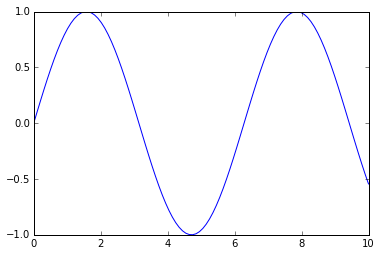

In [20]:
# plotting a line
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))

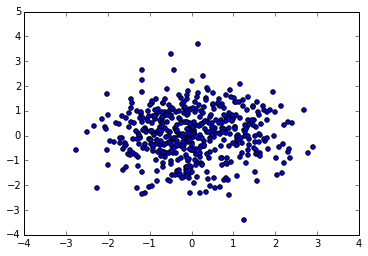

In [21]:
# scatter-plot points
x = np.random.normal(size=500)
y = np.random.normal(size=500)
plt.scatter(x, y)

In [22]:
# showing images
x = np.linspace(1, 12, 100)
y = x[:, np.newaxis]

im = y * np.sin(x) * np.cos(y)
print im.shape

(100, 100)


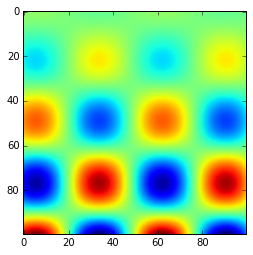

In [23]:
# imshow - note that origin is at the top-left by default!
plt.imshow(im)

<matplotlib.contour.QuadContourSet instance at 0x7f21ae9ec5f0>

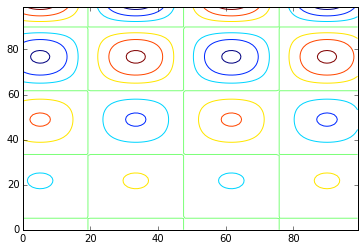

In [24]:
# Contour plot - note that origin here is at the bottom-left by default!
plt.contour(im)

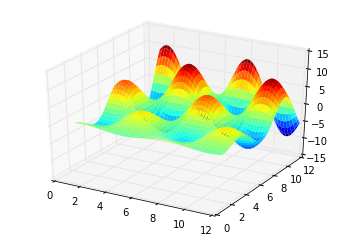

In [25]:
# 3D plotting
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
xgrid, ygrid = np.meshgrid(x, y.ravel())
ax.plot_surface(xgrid, ygrid, im, cmap=plt.cm.jet, cstride=2, rstride=2, linewidth=0)

There are many, many more plot types available.  One useful way to explore these is by
looking at the matplotlib gallery: http://matplotlib.org/gallery.html

You can test these examples out easily in the notebook: simply copy the ``Source Code``
link on each page, and put it in a notebook using the ``%load`` magic.
For example:

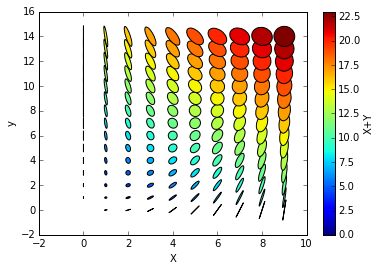

In [27]:
# %load http://matplotlib.org/mpl_examples/pylab_examples/ellipse_collection.py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import EllipseCollection

x = np.arange(10)
y = np.arange(15)
X, Y = np.meshgrid(x, y)

XY = np.hstack((X.ravel()[:,np.newaxis], Y.ravel()[:,np.newaxis]))

ww = X/10.0
hh = Y/15.0
aa = X*9


fig, ax = plt.subplots()

ec = EllipseCollection(
                        ww,
                        hh,
                        aa,
                        units='x',
                        offsets=XY,
                        transOffset=ax.transData)
ec.set_array((X+Y).ravel())
ax.add_collection(ec)
ax.autoscale_view()
ax.set_xlabel('X')
ax.set_ylabel('y')
cbar = plt.colorbar(ec)
cbar.set_label('X+Y')
plt.show()


